<a href="https://colab.research.google.com/github/Francis-Subasinghe/TrendCast/blob/main/MScProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [ ]:
import pycaret
from sklearn.linear_model import Ridge
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/data.csv')

# 1. Handling Missing Values
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Option 1: Fill missing values with the mean (for numerical columns)
df.fillna(df.mean(), inplace=True)

# 2. Handling Outliers
# Using Z-score to identify and remove outliers in numerical columns
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for what is considered an outlier
threshold = 3

# Identify and remove outliers
df = df[(z_scores < threshold).all(axis=1)]

# 3. Correcting Categorical Data
# Identify unique values in categorical columns
for col in df.select_dtypes(include=[object]).columns:
    print(f"Unique values in {col} before cleaning: {df[col].unique()}")

# 4. Removing Duplicates
# Check for and remove duplicate rows
df.drop_duplicates(inplace=True)

# Final check after cleaning
print("Data after cleaning:\n", df.info())

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)


Missing values per column:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0 

In [ ]:
# Print the columns in the DataFrame to identify potential mismatches.
df.columns = df.columns.str.strip()
print(df.columns)

featuresAll = df.columns

features_to_retain = [
    'ROA(C) before interest and depreciation before interest',
    'Operating Gross Margin',
    'Operating Profit Rate',
    'Pre-tax net Interest Rate',
    'Operating Expense Rate',
    'Research and development expense rate',
    'Cash flow rate',
    'Interest-bearing debt interest rate',
    'Net Value Per Share (B)',
    'Current Ratio',
    'Net Income to Stockholders Equity'
]

featuresDF = df[features_to_retain]

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [ ]:
featuresDF.shape

(6819, 11)

In [ ]:
featuresDF.dtypes

,0
ROA(C) before interest and depreciation before interest,float64
Operating Gross Margin,float64
Operating Profit Rate,float64
Pre-tax net Interest Rate,float64
Operating Expense Rate,float64
Research and development expense rate,float64
Cash flow rate,float64
Interest-bearing debt interest rate,float64
Net Value Per Share (B),float64
Current Ratio,float64


In [ ]:
featuresDF.describe()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (B),Current Ratio,Net Income to Stockholders Equity
count,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000
mean,0.505180,0.607948,0.998755,0.797190,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.190661,4.032850e+05,0.840402
std,0.060686,0.016934,0.013010,0.012869,3.237684e+09,2.598292e+09,0.017036,1.082750e+08,0.033390,3.330216e+07,0.014523
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.476527,0.600445,0.998969,0.797386,1.566870e-04,1.281880e-04,0.461558,2.030200e-04,0.173613,7.555047e-03,0.840115
50%,0.502706,0.605997,0.999022,0.797464,2.777590e-04,5.090000e+08,0.465080,3.210320e-04,0.184400,1.058717e-02,0.841179
75%,0.535563,0.613914,0.999095,0.797579,4.145000e+09,3.450000e+09,0.471004,5.325530e-04,0.199570,1.626953e-02,0.842357
max,1.000000,1.000000,1.000000,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,2.750000e+09,1.000000


In [ ]:
print(featuresDF.columns)

Index(['ROA(C) before interest and depreciation before interest',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Current Ratio', 'Net Income to Stockholders Equity'],
      dtype='object')


In [ ]:
featuresDF.isnull().sum()

,0
ROA(C) before interest and depreciation before interest,0
Operating Gross Margin,0
Operating Profit Rate,0
Pre-tax net Interest Rate,0
Operating Expense Rate,0
Research and development expense rate,0
Cash flow rate,0
Interest-bearing debt interest rate,0
Net Value Per Share (B),0
Current Ratio,0


In [ ]:
from pycaret.regression import setup, compare_models, tune_model

# Initialize PyCaret setup, disabling stratification
clf1 = setup(
    data=featuresDF,
    target='Net Income to Stockholders Equity',
    data_split_stratify=False
)

# Train and compare all models, selecting the best one based on R2 score, excluding the dummy regressor
best_model = compare_models(sort='R2', exclude=['dummy'])


,Description,Value
0,Session id,7024
1,Target,Net Income to Stockholders Equity
2,Target type,Regression
3,Original data shape,"(6819, 11)"
4,Transformed data shape,"(6819, 11)"
5,Transformed train set shape,"(4773, 11)"
6,Transformed test set shape,"(2046, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0028,0.0003,0.0117,-0.0113,0.0072,0.0035,0.0950
lr,Linear Regression,0.0028,0.0003,0.0117,-0.0128,0.0072,0.0035,1.3310
lasso,Lasso Regression,0.0028,0.0003,0.0117,-0.0128,0.0072,0.0035,0.0700
en,Elastic Net,0.0028,0.0003,0.0117,-0.0128,0.0072,0.0035,0.0770
llar,Lasso Least Angle Regression,0.0028,0.0003,0.0117,-0.0128,0.0072,0.0035,0.0520
lightgbm,Light Gradient Boosting Machine,0.0018,0.0003,0.0126,-0.8262,0.0078,0.0022,3.1890
gbr,Gradient Boosting Regressor,0.0014,0.0002,0.0103,-0.8759,0.0066,0.0016,1.8060
dt,Decision Tree Regressor,0.0016,0.0004,0.0129,-1.6066,0.0086,0.0020,0.1790
rf,Random Forest Regressor,0.0015,0.0003,0.0129,-1.6204,0.0080,0.0018,5.1140
et,Extra Trees Regressor,0.0016,0.0003,0.0130,-1.7763,0.0080,0.0019,1.6940


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
# print best_model parameters
print(best_model)

OrthogonalMatchingPursuit()


In [ ]:
# tune the best model
tuned_best_model = tune_model(best_model)
print(tuned_best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0051,0.0020,0.0450,-0.0027,0.0315,0.0058
1,0.0022,0.0000,0.0032,-0.0182,0.0018,0.0026
2,0.0036,0.0004,0.0200,-0.0049,0.0120,0.0052
3,0.0025,0.0001,0.0098,0.0043,0.0056,0.0031
4,0.0023,0.0000,0.0054,0.0122,0.0030,0.0028
5,0.0023,0.0000,0.0049,0.0049,0.0027,0.0028
6,0.0022,0.0000,0.0034,-0.0412,0.0019,0.0026
7,0.0025,0.0001,0.0085,-0.0221,0.0045,0.0030
8,0.0032,0.0002,0.0131,0.0002,0.0072,0.0040


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
OrthogonalMatchingPursuit()


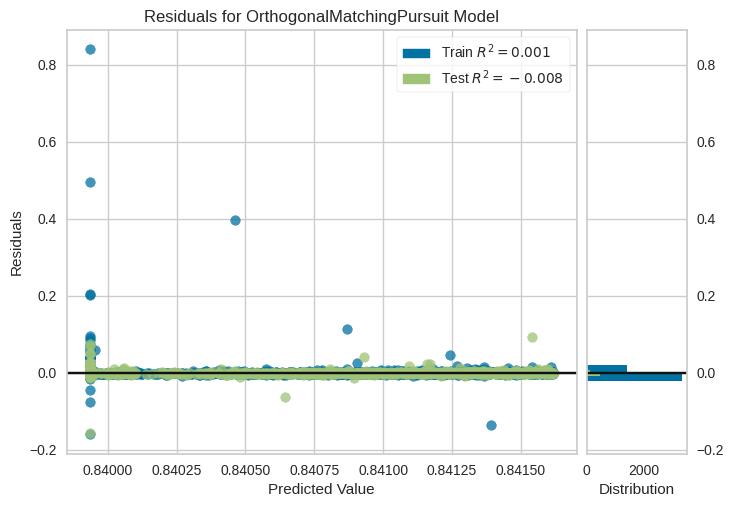

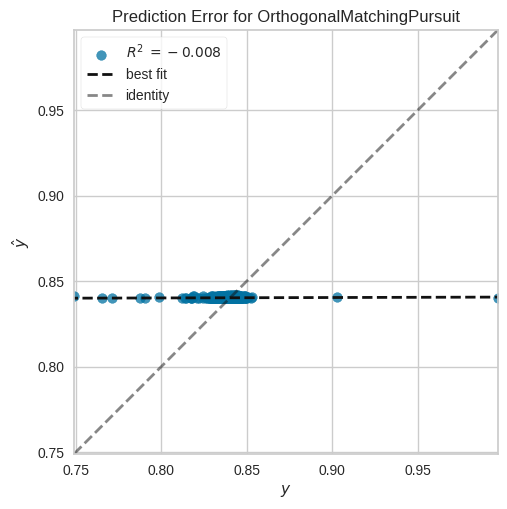

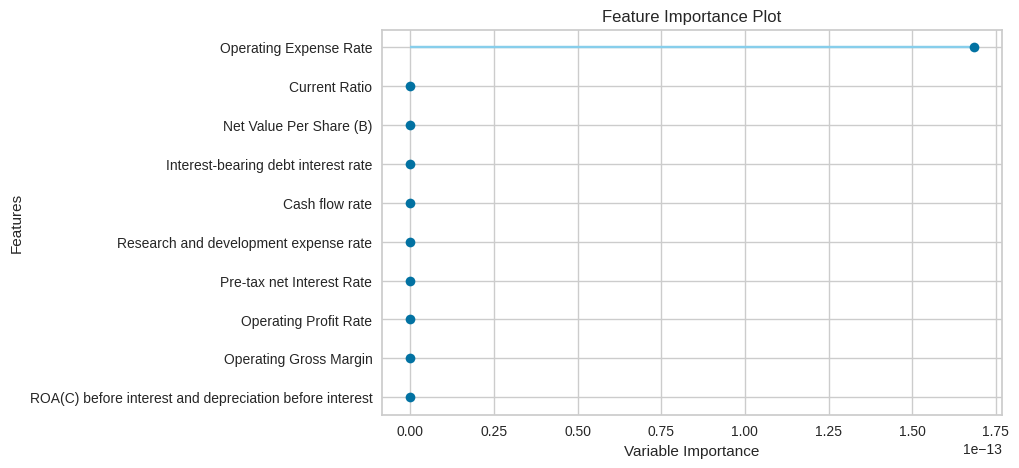

In [ ]:
#MODEL EVALUATION

from pycaret.regression import plot_model

# Plot residuals
plot_model(tuned_best_model, plot = 'residuals')

# Plot predicted vs actual values
plot_model(tuned_best_model, plot = 'error')

# Plot feature importance
plot_model(tuned_best_model, plot = 'feature')

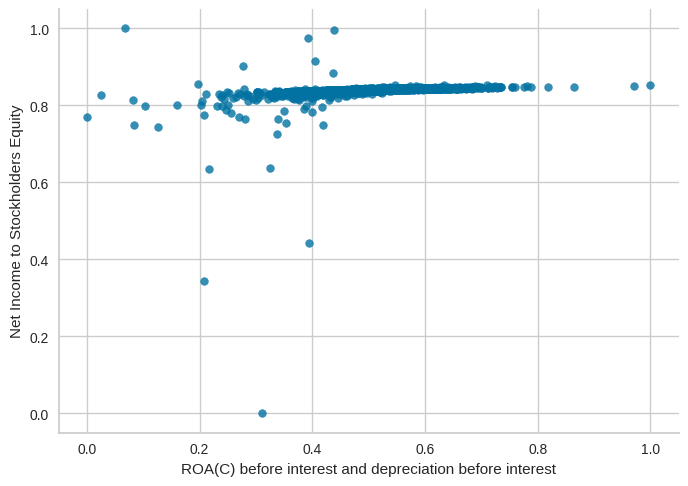

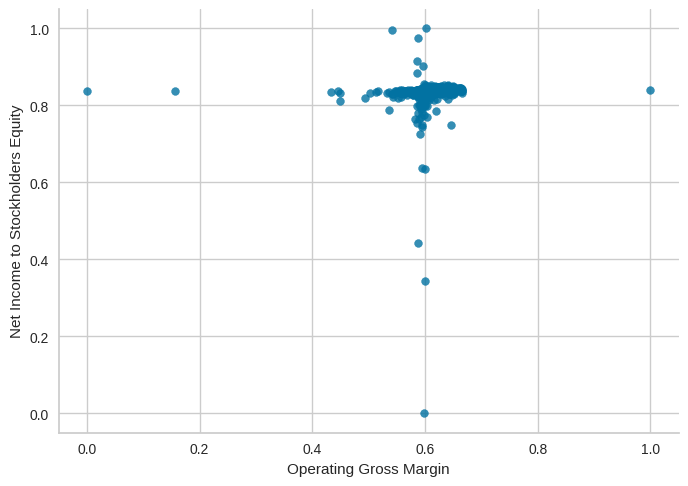

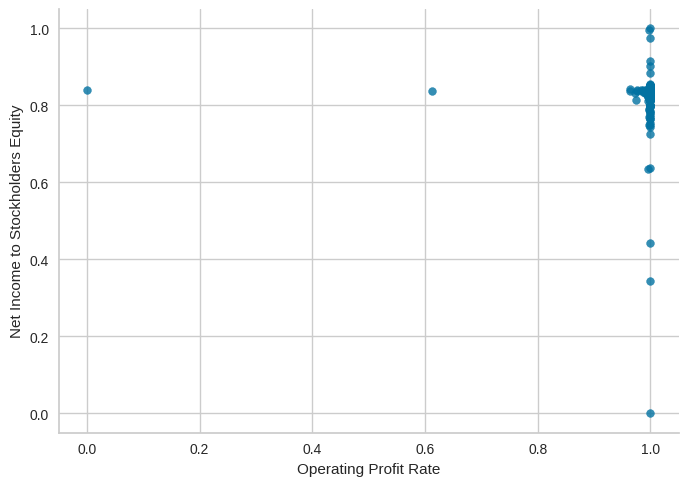

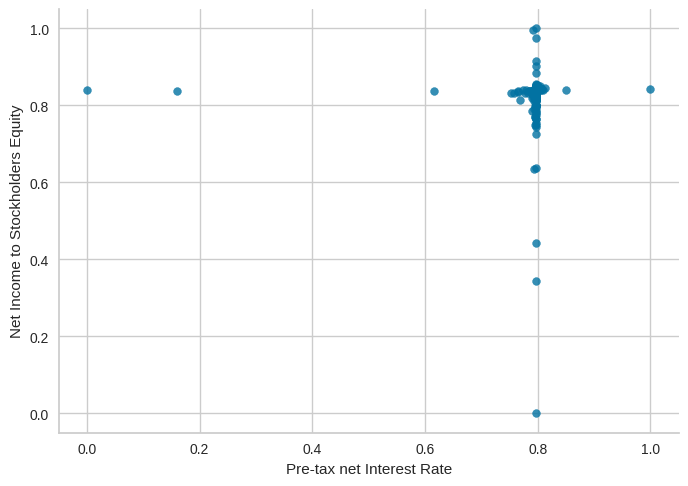

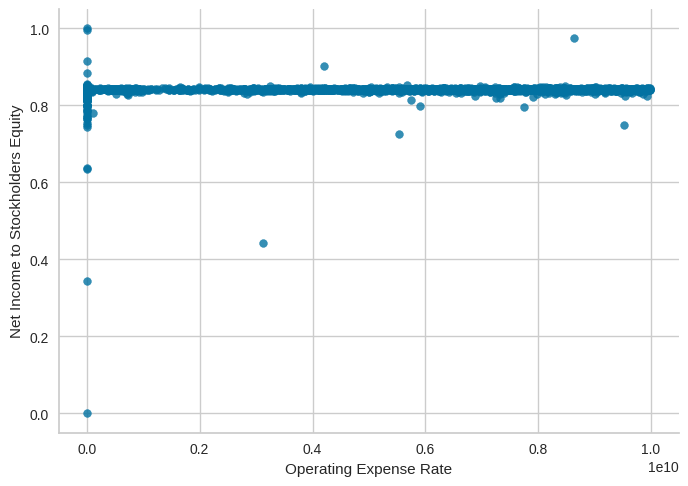

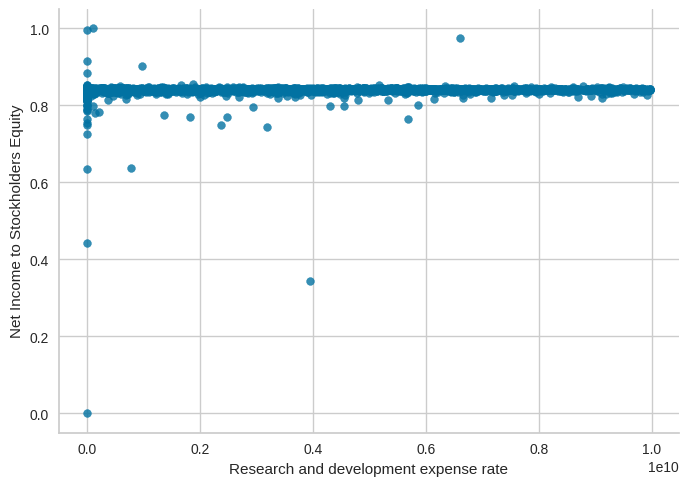

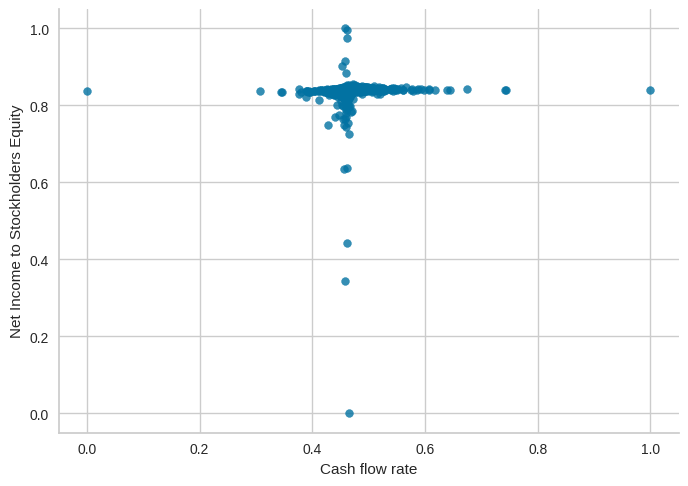

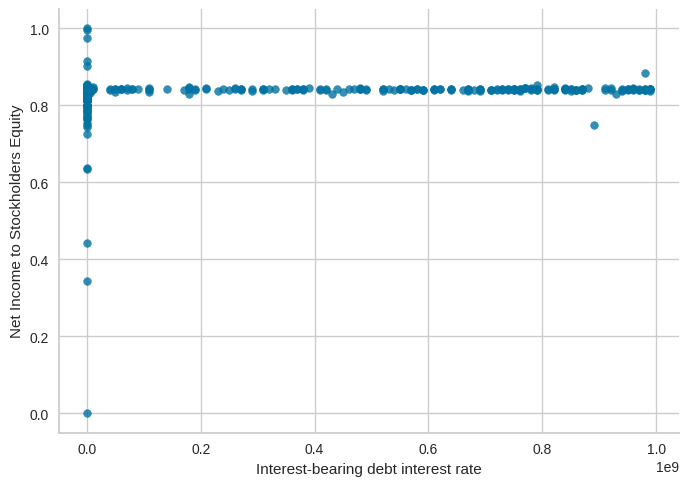

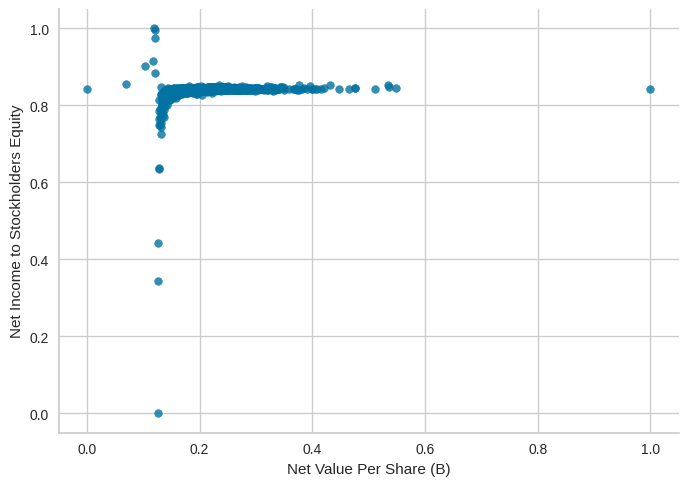

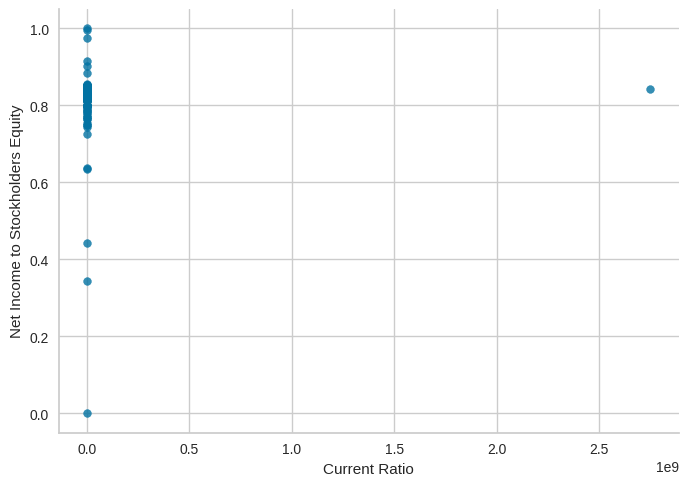

In [ ]:
df.plot(kind='scatter', x='ROA(C) before interest and depreciation before interest', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Operating Gross Margin', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Operating Profit Rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Pre-tax net Interest Rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Operating Expense Rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Research and development expense rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Cash flow rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Interest-bearing debt interest rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Net Value Per Share (B)', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Current Ratio', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [ ]:

# List of features to be input by the user
features_list = [
    'ROA(C) before interest and depreciation before interest',
    'Operating Gross Margin',
    'Operating Profit Rate',
    'Pre-tax net Interest Rate',
    'Operating Expense Rate',
    'Research and development expense rate',
    'Cash flow rate',
    'Interest-bearing debt interest rate',
    'Net Value Per Share (B)',
    'Current Ratio'
]

# Function to prompt user input for features
def get_user_input():
    user_input = []
    for feature in features_list:
        value = float(input(f"Enter value for {feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Get user input
user_features = get_user_input()

# Make prediction using the trained model
user_prediction = tuned_best_model.predict(user_features)

# Display the prediction
print(f"Prediction for the input data: {user_prediction[0]}")


Enter value for ROA(C) before interest and depreciation before interest: 1
Enter value for Operating Gross Margin: 2
Enter value for Operating Profit Rate: 2
Enter value for Pre-tax net Interest Rate: 3
Enter value for Operating Expense Rate: 2
Enter value for Research and development expense rate: 3
Enter value for Cash flow rate: 3
Enter value for Interest-bearing debt interest rate: 2
Enter value for Net Value Per Share (B): 2
Enter value for Current Ratio: 2
Prediction for the input data: 0.8399358987811596


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


# List of features to be input by the user
features_list = [
    'ROA(C) before interest and depreciation before interest',
    'Operating Gross Margin',
    'Operating Profit Rate',
    'Pre-tax net Interest Rate',
    'Operating Expense Rate',
    'Research and development expense rate',
    'Cash flow rate',
    'Interest-bearing debt interest rate',
    'Net Value Per Share (B)',
    'Current Ratio'
]

# Function to prompt user input for features
def get_user_input():
    user_input = []
    for feature in features_list:
        value = float(input(f"Enter value for {feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Get user input
user_features = get_user_input()

# Define the base models
base_models = [
    ('ridge', RidgeCV()),
    ('dt', DecisionTreeRegressor(max_depth=5)),
    ('gbr', GradientBoostingRegressor())
]

# Define the stacking model with a linear regression meta-model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the stacking model on the entire dataset (df) instead of just user_features
stacking_model.fit(df[features_list], df['Net Income to Stockholders Equity'])

# Now you can predict using the stacking model with user_features
stacking_predictions = stacking_model.predict(user_features)

# Display the prediction
print(f"Prediction for the input data using StackingRegressor: {stacking_predictions[0]}")


Enter value for ROA(C) before interest and depreciation before interest: 1
Enter value for Operating Gross Margin: 2
Enter value for Operating Profit Rate: 2
Enter value for Pre-tax net Interest Rate: 2
Enter value for Operating Expense Rate: 1
Enter value for Research and development expense rate: 1
Enter value for Cash flow rate: 2
Enter value for Interest-bearing debt interest rate: 2
Enter value for Net Value Per Share (B): 2
Enter value for Current Ratio: 2
Prediction for the input data using StackingRegressor: 0.853254779901718


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selects only the feature columns for prediction, excluding the target variable
predictions = stacking_model.predict(df[features_list])

# Calculate the evaluation metrics
r2 = r2_score(df['Net Income to Stockholders Equity'], predictions)
mae = mean_absolute_error(df['Net Income to Stockholders Equity'], predictions)
mse = mean_squared_error(df['Net Income to Stockholders Equity'], predictions)
rmse = mse ** 0.5

# Print the metrics
print(f'\nModel Evaluation Metrics:')
print(f'R²: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


Model Evaluation Metrics:
R²: 0.8892808648701414
MAE: 0.0010916613847161507
MSE: 2.334765791926838e-05
RMSE: 0.004831941423410303


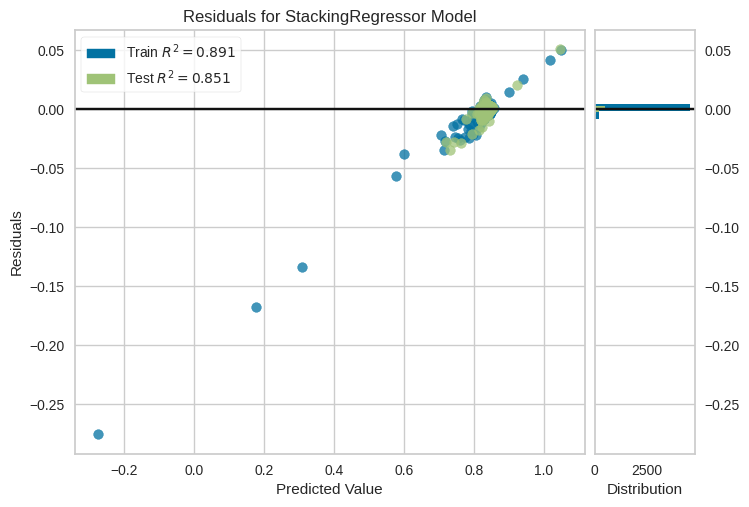

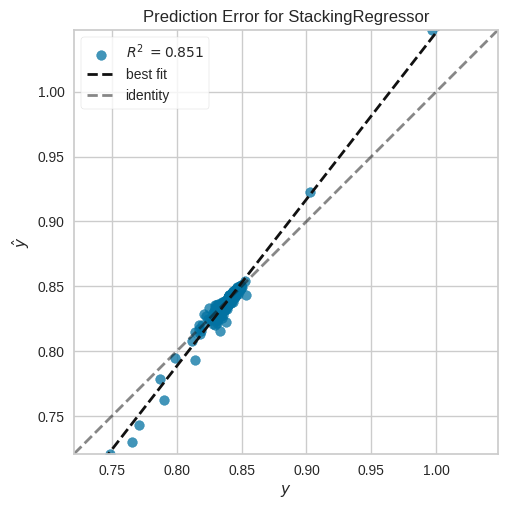

In [ ]:
#MODEL EVALUATION FOR STACKING REGRESSOR

from pycaret.regression import plot_model

# Plot residuals
plot_model(stacking_model, plot = 'residuals')

# Plot predicted vs actual values
plot_model(stacking_model, plot = 'error')


In [ ]:
# Save the AutoML model to a file
joblib.dump(tuned_best_model, 'AutoML_model.pkl')

# Optionally, print a message to confirm the model is saved
print("Model saved successfully.")

Model saved successfully.


In [ ]:

# Save the Stacking Regressor model to a file
joblib.dump(stacking_model, 'Stacking_model.pkl')

# Optionally, print a message to confirm the model is saved
print("Model saved successfully.")

Model saved successfully.


**LINEAR REGRESSION MODEL AFTER THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1**

In [ ]:
# Feature Selection
# We will select only those features which have association i.e., which majorly impacts our target variable
x = df[['ROA(C) before interest and depreciation before interest',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Current Ratio']]

#target variable
y = df["Net Income to Stockholders Equity"]

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [ ]:
# Splitting into training set and testing set
# test_size=0.2 means the train set will be 80% and test set will be 20%
# random_state means that whenever we split the data it will split in same way as we have specified a number to it, the number can be anything
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Model Fitting
# We have selected Linear regression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [ ]:
print(xtest)

In [ ]:
# Change featuresDF.DataFrame to pd.DataFrame
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

In [ ]:
# Predicting on Sample data from dataset
d1=df.sample(10)
d1=d1[['ROA(C) before interest and depreciation before interest',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Current Ratio']]
d1=d1.to_numpy()
ypred1=model.predict(d1)
print(ypred1)

In [ ]:
from sklearn import metrics
from tabulate import tabulate

# Assuming ytest and ypred are your true and predicted values
mae = metrics.mean_absolute_error(ytest, ypred)
mse = metrics.mean_squared_error(ytest, ypred)
r2 = metrics.r2_score(ytest, ypred)

# Create a table using tabulate
table = [
    ["Mean Absolute Error (MAE)", mae],
    ["Mean Squared Error (MSE)", mse],
    ["R-squared (R2)", r2]
]

# Print the table
print(tabulate(table, headers=["Metric", "Value"]))


In [ ]:
# Function to make predictions
def make_prediction(input_data):
    """
    Make a prediction using the trained linear regression model.

    Args:
    input_data (dict): Dictionary containing input data for the model.

    Returns:
    float: Predicted value.
    """
    input_df = pd.DataFrame(input_data, index=[0])
    prediction = model.predict(input_df)
    return prediction[0]

# Example usage of make_prediction function
new_data = {
    'ROA(C) before interest and depreciation before interest': 0.1,
    'Operating Gross Margin': 0.2,
    'Operating Profit Rate': 0.3,
    'Pre-tax net Interest Rate': 0.4,
    'Operating Expense Rate': 0.5,
    'Research and development expense rate': 0.6,
    'Cash flow rate': 0.7,
    'Interest-bearing debt interest rate': 0.8,
    'Net Value Per Share (B)': 0.9,
    'Current Ratio': 1.0
}

prediction = make_prediction(new_data)
print("Prediction for new data:", prediction)

In [ ]:
# List of features to be input by the user
features_list = [
    'ROA(C) before interest and depreciation before interest',
    'Operating Gross Margin',
    'Operating Profit Rate',
    'Pre-tax net Interest Rate',
    'Operating Expense Rate',
    'Research and development expense rate',
    'Cash flow rate',
    'Interest-bearing debt interest rate',
    'Net Value Per Share (B)',
    'Current Ratio'
]

# Function to prompt user input for features
def get_user_input():
    user_input = []
    for feature in features_list:
        value = float(input(f"Enter value for {feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Get user input
user_features = get_user_input()

# Make prediction using the trained model
user_prediction = model.predict(user_features)

# Display the prediction
print(f"Prediction for the input data: {user_prediction[0]}")

In [ ]:
# Save the model to a file
joblib.dump(model, 'ridge_model.pkl')

# Optionally, print a message to confirm the model is saved
print("Ridge Regression model saved successfully.")

In [ ]:
# Setting Up Streamlit

!pip install streamlit pyngrok joblib

In [ ]:
# Set up ngrok
from pyngrok import ngrok

# Kill any existing tunnels to avoid conflicts
ngrok.kill()

# Set up ngrok authentication
!ngrok authtoken 2P1COQyv8ThEv0HpisRjiPCRVQj_f8JFBXFvcXtxcBCidXf9

# Set up a tunnel to the streamlit app
public_url = ngrok.connect(8501)
print(f"Streamlit app can be accessed at: {public_url}")

# Start the Streamlit app
!streamlit run app.py &>/dev/null&